In [1]:
import matplotlib.pyplot as plt


In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
    dataArray = {   "Home": ["Arsenal", 2, 53.2, 10, 4, 2, 701, 87, 48],
                    "Away": ["Tottenham", 0, 46.8, 6, 3, 2, 350, 81, 58],
                    "Max":  ["None", 10, 100.0, 20, 20, 20, 1000, 100, 100]}
    data = pd.DataFrame( dataArray, index=[ "TeamName", "Score", "Possesion", "Shots", "Shots on Target", "Created Chance", "Passes", "Completed Passes", "Duels"] )

In [5]:
data

,Home,Away,Max
TeamName,Arsenal,Tottenham,None
Score,2,0,10
Possesion,53.2,46.8,100.0
Shots,10,6,20
Shots on Target,4,3,20
Created Chance,2,2,20
Passes,701,350,1000
Completed Passes,87,81,100
Duels,48,58,100


In [6]:
for row in data.index:
    id = data.index.get_loc(row)
    data["Max"].iloc[id] = data["Home"].iloc[id] + data["Away"].iloc[id]

In [7]:
data

,Home,Away,Max
TeamName,Arsenal,Tottenham,ArsenalTottenham
Score,2,0,2
Possesion,53.2,46.8,100.0
Shots,10,6,16
Shots on Target,4,3,7
Created Chance,2,2,4
Passes,701,350,1051
Completed Passes,87,81,168
Duels,48,58,106


In [8]:
data["Max"] = data["Home"] + data["Away"]

In [9]:
data

,Home,Away,Max
TeamName,Arsenal,Tottenham,ArsenalTottenham
Score,2,0,2
Possesion,53.2,46.8,100.0
Shots,10,6,16
Shots on Target,4,3,7
Created Chance,2,2,4
Passes,701,350,1051
Completed Passes,87,81,168
Duels,48,58,106


In [10]:
teamNameId = data.index.get_loc("TeamName")
data["Max"].iloc[teamNameId] = ""

In [11]:
data

,Home,Away,Max
TeamName,Arsenal,Tottenham,
Score,2,0,2
Possesion,53.2,46.8,100.0
Shots,10,6,16
Shots on Target,4,3,7
Created Chance,2,2,4
Passes,701,350,1051
Completed Passes,87,81,168
Duels,48,58,106


In [12]:
vis_data = data.drop("TeamName")

In [13]:
vis_data

,Home,Away,Max
Score,2,0,2
Possesion,53.2,46.8,100.0
Shots,10,6,16
Shots on Target,4,3,7
Created Chance,2,2,4
Passes,701,350,1051
Completed Passes,87,81,168
Duels,48,58,106


In [14]:
vis_data["Home"] = 100 * vis_data["Home"] / vis_data["Max"]

In [15]:
vis_data["Away"] = 100 * vis_data["Away"] / vis_data["Max"]

In [16]:
vis_data

,Home,Away,Max
Score,100.000000,0.000000,2
Possesion,53.200000,46.800000,100.0
Shots,62.500000,37.500000,16
Shots on Target,57.142857,42.857143,7
Created Chance,50.000000,50.000000,4
Passes,66.698382,33.301618,1051
Completed Passes,51.785714,48.214286,168
Duels,45.283019,54.716981,106


In [17]:
x_array = np.arange(len(vis_data.index))

In [18]:
x_array

array([0, 1, 2, 3, 4, 5, 6, 7])

In [19]:
face_color = {"Home":"red", "Away":"blue"}

In [20]:
left_data = pd.Series(np.zeros(len(vis_data.index)), index=vis_data.index.to_list())

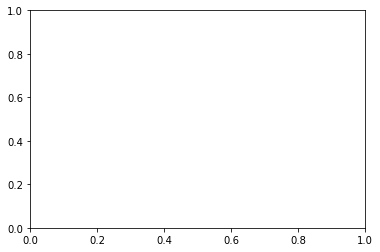

In [21]:
fig, ax = plt.subplots()

In [22]:
ax.set_xticks([])
ax.set_ylim([len(vis_data.index), -1])
ax.set_xlim([0,100])

(0.0, 100.0)

In [23]:
for i in range(len(vis_data.columns)):
    if vis_data.columns[i] != "Max":
        bar_list = ax.barh( x_array, vis_data[vis_data.columns[i]], left=left_data, edgecolor="White", linewidth=0.5, tick_label=vis_data.index.values, alpha = 0.6)
        for j in range(len(bar_list)):
            bar_list[j].set_facecolor(face_color[vis_data.columns[i]])
            bar_list[i].set_alpha(0.8)
        left_data += vis_data[vis_data.columns[i]]



In [24]:
    ax.tick_params(bottom=False,
                left=False,
                right=False,
                top=False)
    ax.spines["right"].set_color("none")  # 右消し
    ax.spines["left"].set_color("none")   # 左消し
    ax.spines["top"].set_color("none")    # 上消し
    ax.spines["bottom"].set_color("none")  # 下消し

In [25]:
space = 1
x = 50
y = 0

for i in range(len(vis_data.index)):
    row = vis_data.index[i]
    dataId = data.index.get_loc(row)
    homeNum = data["Home"].iloc[dataId]
    awayNum = data["Away"].iloc[dataId]

    ax.text(  5, y, homeNum, size=12, color="white",  ha="center", va="center")
    ax.text( 95, y, awayNum, size=12, color="white", ha="center", va="center")

    y+=space

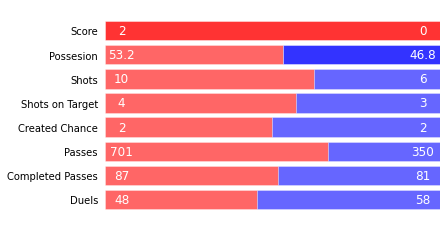

In [26]:
fig

In [27]:
fig.set_facecolor("darkgray")

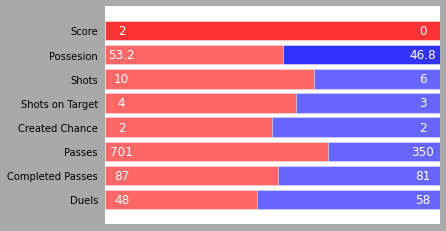

In [28]:
fig
